In [1]:
import numpy as np
import matplotlib.pyplot as plt

import chess

from env import *
env = Chess_env()
obs = env.reset()

from deepQ import *

In [2]:
for step in range(100):
    action = np.random.choice(list(env.board.legal_moves))
    _,_,done,_ = env.step(action)

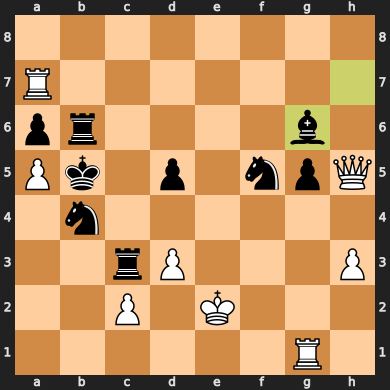

In [3]:
env.board

In [4]:
env.board_feat.translate(env.board.fen())
env.board_feat.board[:,:,3]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
obs = env._next_observation()

np.sum((np.sum(obs[0], axis=0)*(1-env.board_feat.board)),axis=2)

array([[1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [2., 1., 0., 1., 0., 0., 1., 0.],
       [2., 0., 0., 0., 0., 0., 1., 0.],
       [2., 1., 2., 0., 0., 0., 1., 0.],
       [0., 1., 1., 2., 2., 1., 1., 0.],
       [1., 0., 0., 2., 0., 1., 2., 1.]])

In [6]:
model = DeepQ(env, dropout_rate=0.1, L2_reg=10)
model.head.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 13)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 32)          3776      
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 3, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 64)          256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 64)          0     

In [7]:
X,y = env.create_pretraining_dataset(100,400,0.02)
X_test,y_test = env.create_pretraining_dataset(50,400,0.01)



In [11]:
L,Lt = model.pretrain(X,y,X_test,y_test,max_iter=500,lr=1e-3)

Epoch : 0 completed, train loss : 0.19174160668626428, test loss : 0.18814902007579803
Epoch : 1 completed, train loss : 0.17524525336921215, test loss : 0.18530720472335815
Epoch : 2 completed, train loss : 0.18893112055957317, test loss : 0.18585023283958435
Epoch : 3 completed, train loss : 0.1797143230214715, test loss : 0.18590222299098969
Epoch : 4 completed, train loss : 0.1738738319836557, test loss : 0.18428459763526917
Epoch : 5 completed, train loss : 0.16650461871176958, test loss : 0.18548239767551422
Epoch : 6 completed, train loss : 0.16861938405781984, test loss : 0.18573974072933197
Epoch : 7 completed, train loss : 0.162386370357126, test loss : 0.18889713287353516
Epoch : 8 completed, train loss : 0.16285498021170497, test loss : 0.18917451798915863
Epoch : 9 completed, train loss : 0.16241134703159332, test loss : 0.18964911997318268
Epoch : 10 completed, train loss : 0.15698310686275363, test loss : 0.19020706415176392
Epoch : 11 completed, train loss : 0.157825184

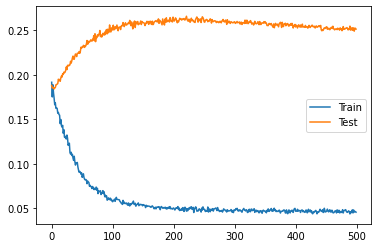

In [12]:
plt.plot(L, label = 'Train')
plt.plot(Lt, label = 'Test')
plt.legend()

In [ ]:
chess_board = Chess_env()

chess_board.board

In [ ]:
chess_board.board.push_san('Bg5')

In [ ]:
chess_board.board_feat.translate(chess_board.board.fen())

chess_board.board

In [ ]:
inp = chess_board._next_observation()

inp = convert_s_to_tensor([inp])

preds = model.model.predict(inp)
print(preds)
print(np.argmax(preds[0]))
print(chess_board.board.legal_moves)
list(chess_board.board.legal_moves)[np.argmax(preds[0])]


In [ ]:
import tensorflow as tf

def convert_s_to_tensor(state):
    out = []
    for i in range(len(state[0])):
        state_array = np.array([state[j][i] for j in range(len(state))])
        out.append(tf.convert_to_tensor(state_array))
    return out

In [8]:
2*2*1024

4096